# Import neccessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## load dataset (using API)

In [2]:
import kagglehub

kagglehub.login()
# {"username":"princejaniya","key":"c2e1f83d0b07f5a939121b876f78d584"}

In [3]:
import kagglehub

path = kagglehub.dataset_download("ishanshrivastava28/tata-online-retail-dataset",force_download=True)
print("Path to dataset files:",path)

100%|█████████████████████████████████████████████████████████████████████████████| 29.0M/29.0M [00:09<00:00, 3.36MB/s]

Extracting files...


Path to dataset files: C:\Users\Prince\.cache\kagglehub\datasets\ishanshrivastava28\tata-online-retail-dataset\versions\1


In [4]:
Data = pd.read_csv(r"C:\Users\Prince\.cache\kagglehub\datasets\ishanshrivastava28\tata-online-retail-dataset\versions\1\Online Retail Data Set.csv",encoding='latin1')
Data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


# Data Dictionary

<div style="text-align: center; margin: 20px 0;">
    <iframe 
        src="https://www.kaggle.com/embed/damerajee/extensive-eda-for-tata-retail?cellIds=7&kernelSessionId=140175370" 
        height="300" 
        style="width: 100%; max-width: 950px; border: none;" 
        scrolling="auto" 
        title="EXTENSIVE EDA FOR TATA RETAIL">
    </iframe>
</div>

<section style="max-width: 950px; margin: 20px auto; font-family: Arial, sans-serif; line-height: 1.6; color: #333;">
    <h3>About This Data</h3>
    <ul style="list-style-type: disc; padding-left: 20px;">
        <li><strong>InvoiceNo:</strong> A unique identifier for each invoice or transaction.</li>
        <li><strong>StockCode:</strong> A code or identifier for the stock or product being sold.</li>
        <li><strong>Description:</strong> A description of the product being sold.</li>
        <li><strong>Quantity:</strong> The quantity of the product being sold in each transaction.</li>
        <li><strong>InvoiceDate:</strong> The date and time when the invoice or transaction occurred.</li>
        <li><strong>UnitPrice:</strong> The price of a single unit of the product.</li>
        <li><strong>CustomerID:</strong> A unique identifier for each customer.</li>
        <li><strong>Country:</strong> The country where the transaction took place or the customer is located.</li>
    </ul>
    <p><em>Note:</em> The dataset may contain NaN values, and there are over 5000 duplicate entries present.</p>
</section>


# Undestanding data

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#000000;">Check the Dimension of data?

In [5]:
Data.shape # see the shape of the data

(541909, 8)

**There are 541909 Observations / Rows and 8 Attributes / Columns.**

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Check the Information about the data and the datatypes of each respective attributes.</span>


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
Data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# LET'S DEAL WITH THE DUPLICATES AND THE MISSING VALUES OR NAN VALUES

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Checking for missing values.</span>


In [8]:
Data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

*There are 1454 and 135080 missing values in Description and CustomerID columns respectively.*

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Dropping the missing values</span>

imupting descriptiom based on stock code

In [9]:
description_impute = Data.groupby('StockCode')['Description'].apply(lambda x: x.mode()[0] if not x.mode().empty else "Unknown Item")
Data['Description'] = Data.apply(lambda row: description_impute[row['StockCode']] if pd.isnull(row['Description']) else row['Description'], axis=1)

retaining customer id

In [10]:
Data['CustomerID'] = Data['CustomerID'].fillna(0)

In [11]:
print("\nMissing values after handling:")
print(Data.isnull().sum())


Missing values after handling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Separating categorical and numerical columns</span>

In [12]:
categorical_cols = Data.select_dtypes(include='object').columns
numerical_cols = Data.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')
Numerical Columns: Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')


<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Identify and count duplicate rows in the dataset</span>

In [13]:
duplicate_rows = Data[Data.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
print(duplicate_rows.head())

Number of duplicate rows: 5268
    InvoiceNo StockCode                        Description  Quantity  \
517    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   

          InvoiceDate  UnitPrice  CustomerID         Country  
517  01-12-2010 11:45       1.25     17908.0  United Kingdom  
527  01-12-2010 11:45       2.10     17908.0  United Kingdom  
537  01-12-2010 11:45       2.95     17908.0  United Kingdom  
539  01-12-2010 11:45       4.95     17908.0  United Kingdom  
555  01-12-2010 11:49       2.95     17920.0  United Kingdom  


Check Duplicates Based on Specific Columns (e.g.,InvoiceNo,StockCode)

In [14]:
# Check for duplicate rows based on specific columns
subset_duplicates = Data[Data.duplicated(subset=['InvoiceNo', 'StockCode'])]
print(f"Number of duplicate rows based on InvoiceNo and StockCode: {subset_duplicates.shape[0]}")
print(subset_duplicates.head())


Number of duplicate rows based on InvoiceNo and StockCode: 10684
    InvoiceNo StockCode                      Description  Quantity  \
125    536381     71270                  PHOTO CLIP LINE         3   
498    536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         1   
502    536409     85116  BLACK CANDELABRA T-LIGHT HOLDER         5   
517    536409     21866      UNION JACK FLAG LUGGAGE TAG         1   
525    536409    90199C  5 STRAND GLASS NECKLACE CRYSTAL         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
125  01-12-2010 09:41       1.25     15311.0  United Kingdom  
498  01-12-2010 11:45       6.35     17908.0  United Kingdom  
502  01-12-2010 11:45       2.10     17908.0  United Kingdom  
517  01-12-2010 11:45       1.25     17908.0  United Kingdom  
525  01-12-2010 11:45       6.35     17908.0  United Kingdom  


 Flag Duplicate Rows

In [15]:
Data['is_duplicate'] = Data.duplicated(keep=False)
print(Data[Data['is_duplicate']].head())

    InvoiceNo StockCode                       Description  Quantity  \
485    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
494    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
521    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   

          InvoiceDate  UnitPrice  CustomerID         Country  is_duplicate  
485  01-12-2010 11:45       4.95     17908.0  United Kingdom          True  
489  01-12-2010 11:45       2.10     17908.0  United Kingdom          True  
494  01-12-2010 11:45       1.25     17908.0  United Kingdom          True  
517  01-12-2010 11:45       1.25     17908.0  United Kingdom          True  
521  01-12-2010 11:45       2.95     17908.0  United Kingdom          True  


<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Removing Duplicate Rows</span>

Remove duplicate rows while retaining the first or last occurrence

In [16]:
Data_cleaned = Data.drop_duplicates()

In [17]:
Data_cleaned = Data.drop_duplicates(keep='last')

Drop duplicates based on specific columns

In [18]:
Data_cleaned = Data.drop_duplicates(subset=['InvoiceNo', 'StockCode'])

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Aggregate and Handle Duplicates</span>

Group by duplicate identifiers and aggregate

In [19]:
Data_cleaned = Data.groupby(['InvoiceNo', 'StockCode'], as_index=False).agg({
    'Quantity': 'sum',        # Sum quantities for duplicates
    'UnitPrice': 'mean',      # Take average price
    'Description': 'first',   # Retain the first description
    'CustomerID': 'first',    # Retain the first customer ID
    'Country': 'first'        # Retain the first country
})

Recheck Remaining Duplicates

In [20]:
remaining_duplicates = Data_cleaned[Data_cleaned.duplicated()]
print(f"Number of remaining duplicate rows: {remaining_duplicates.shape[0]}")
print(remaining_duplicates.head())

Number of remaining duplicate rows: 0
Empty DataFrame
Columns: [InvoiceNo, StockCode, Quantity, UnitPrice, Description, CustomerID, Country]
Index: []


Verify

In [21]:
print(f"Number of duplicate rows after final cleanup: {Data_cleaned.duplicated().sum()}")

Number of duplicate rows after final cleanup: 0


<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Extracting Date and Time Components from InvoiceDate</span>

Convert 'InvoiceDate' to datetime

In [22]:
Data['InvoiceDate'] = pd.to_datetime(Data['InvoiceDate'], format='%d-%m-%Y %H:%M')

Extract date and time components

In [23]:
Data['Month'] = Data['InvoiceDate'].dt.month_name()  # Month name
Data['Day'] = Data['InvoiceDate'].dt.day_name()      # Day name
Data['Year'] = Data['InvoiceDate'].dt.year           # Year
Data['Time'] = Data['InvoiceDate'].dt.time           # Time

In [24]:
Data['Total_sales'] = Data['Quantity'] * Data['UnitPrice']


In [25]:
Data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_duplicate,Month,Day,Year,Time,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,December,Wednesday,2010,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,December,Wednesday,2010,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,December,Wednesday,2010,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,December,Wednesday,2010,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,December,Wednesday,2010,08:26:00,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,False,December,Wednesday,2010,08:26:00,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,False,December,Wednesday,2010,08:26:00,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,False,December,Wednesday,2010,08:28:00,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,False,December,Wednesday,2010,08:28:00,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,False,December,Wednesday,2010,08:34:00,54.08


# Outlier Detection (Boxplot)

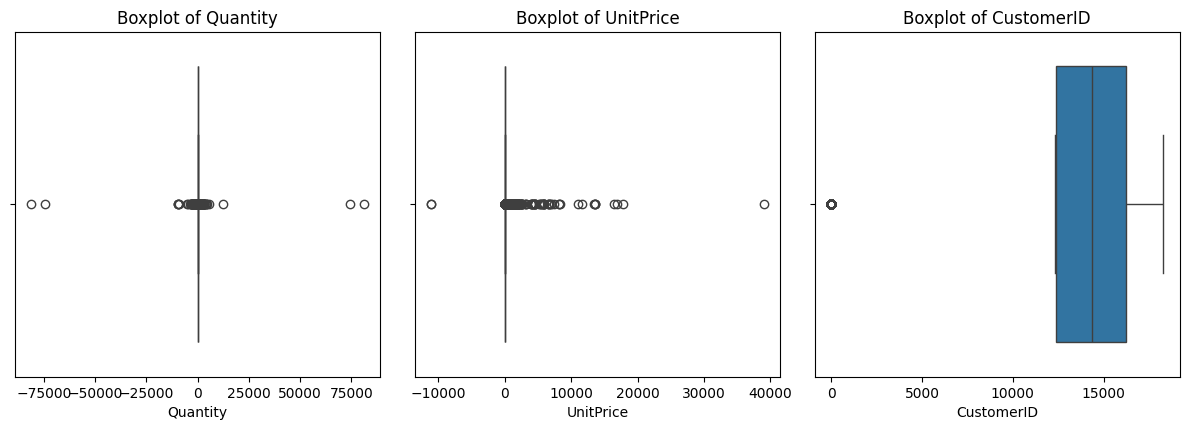

In [26]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Adjust subplot dimensions as needed
    sns.boxplot(x=Data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Calculate IQR and Define Boundaries (Interquartile Range)

Calculate Q1 and Q3 (the 25th and 75th percentiles)

In [27]:
Q1 = Data[numerical_cols].quantile(0.25)
Q3 = Data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Impute Outliers by Clipping

In [28]:
Data_cleaned = Data.copy()
for col in numerical_cols:
    Data_cleaned[col] = Data_cleaned[col].clip(lower=lower_bound[col], upper=upper_bound[col])


Verify the Clipping

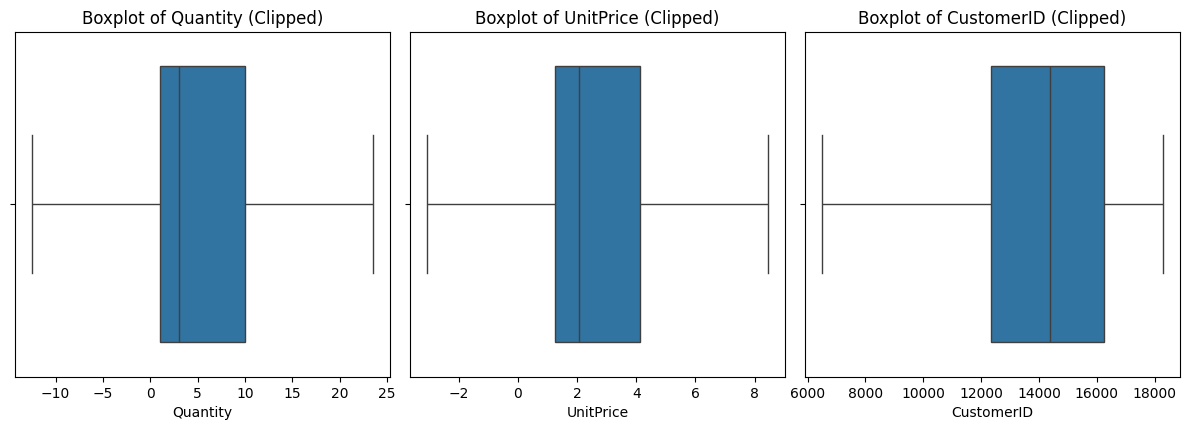

In [29]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=Data_cleaned[col])
    plt.title(f'Boxplot of {col} (Clipped)')
plt.tight_layout()
plt.show()

# Univariate Analysis

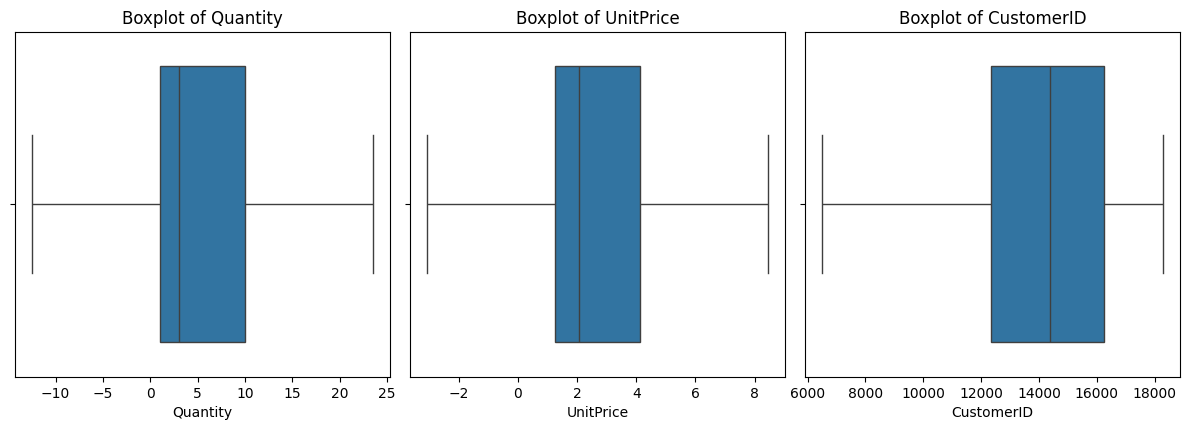

In [30]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=Data_cleaned[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


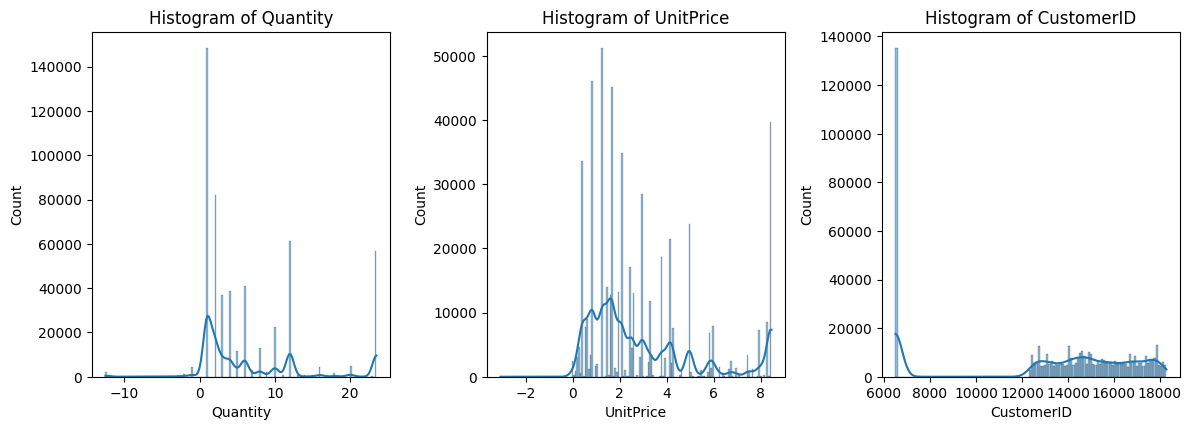

In [31]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(Data_cleaned[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


In [32]:
# Check columns for non-numeric values
non_numeric_columns = Data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Check unique values in non-numeric columns
for col in non_numeric_columns:
    print(f"Unique values in {col}: {Data[col].unique()}")


Non-numeric columns: Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country',
       'is_duplicate', 'Month', 'Day', 'Time'],
      dtype='object')
Unique values in InvoiceNo: ['536365' '536366' '536367' ... '581585' '581586' '581587']
Unique values in StockCode: ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
Unique values in Description: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
Unique values in InvoiceDate: <DatetimeArray>
['2010-12-01 08:26:00', '2010-12-01 08:28:00', '2010-12-01 08:34:00',
 '2010-12-01 08:35:00', '2010-12-01 08:45:00', '2010-12-01 09:00:00',
 '2010-12-01 09:01:00', '2010-12-01 09:02:00', '2010-12-01 09:09:00',
 '2010-12-01 09:32:00',
 ...
 '2011-12-09 12:09:00', '2011-12-09 12:16:00', '2011-12-09 12:19:00',
 '2011-12-09 12:20:00', '2011-12-09 12:21:00', '2011-12-09 12:23:00',
 '2011-12-09 12:25:00', '2011-12

In [33]:
# Select only the numerical columns
numerical_data = Data.select_dtypes(include=[np.number])

# Calculate summary statistics for numerical columns only
summary_stats = numerical_data.agg(['mean', 'median', 'min', 'max', 'std', 'quantile'])
print("Summary Statistics for Numerical Columns:")
print(summary_stats)


Summary Statistics for Numerical Columns:
              Quantity     UnitPrice    CustomerID         Year    Total_sales
mean          9.552250      4.611114  11476.974671  2010.921609      17.987795
median        3.000000      2.080000  14382.000000  2011.000000       9.750000
min      -80995.000000 -11062.060000      0.000000  2010.000000 -168469.600000
max       80995.000000  38970.000000  18287.000000  2011.000000  168469.600000
std         218.081158     96.759853   6777.908326     0.268787     378.810824
quantile      3.000000      2.080000  14382.000000  2011.000000       9.750000


Skewness for each numerical column:
 Quantity        -0.264076
UnitPrice      186.506972
CustomerID      -0.995496
Year            -3.137135
Total_sales     -0.964389
dtype: float64


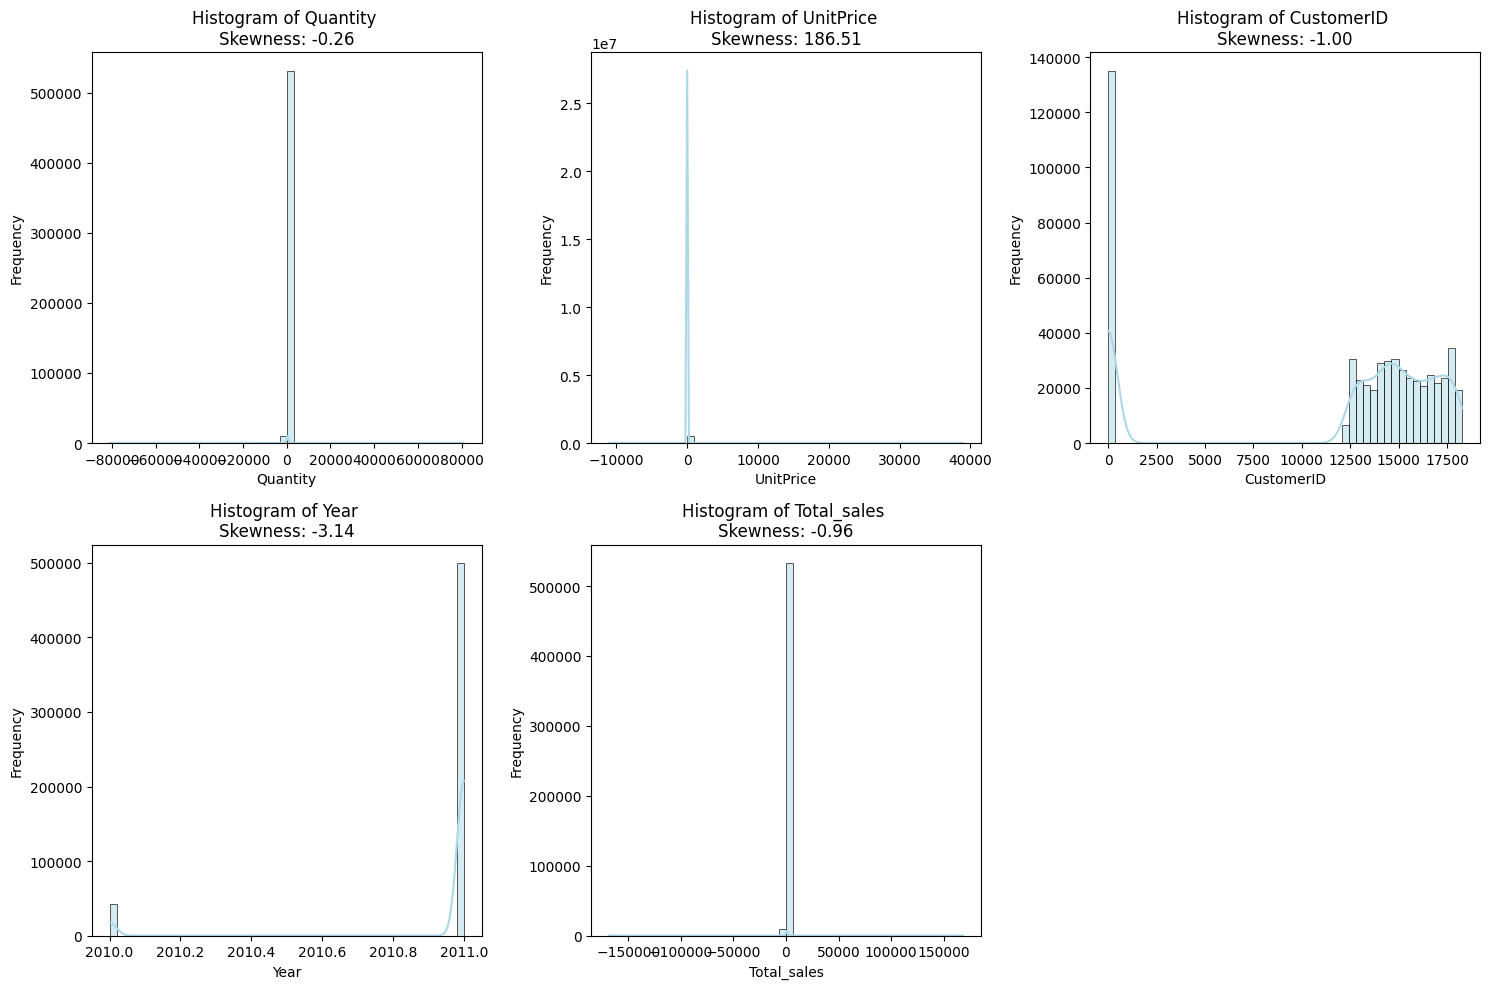

In [34]:
# List of numerical columns
numerical_columns = ['Quantity', 'UnitPrice', 'CustomerID', 'Year', 'Total_sales']

# Compute skewness for each numerical column
skewness = Data[numerical_columns].skew()
print("Skewness for each numerical column:\n", skewness)

# Plot histograms and skewness
plt.figure(figsize=(15, 10))  # Set the figure size

# Loop through each numerical column and plot the histogram
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust subplot layout as needed
    sns.histplot(Data[col], kde=True, color='lightblue', bins=50)  # Plot histogram and KDE
    plt.title(f"Histogram of {col} \nSkewness: {skewness[col]:.2f}")  # Display skewness in the title
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()

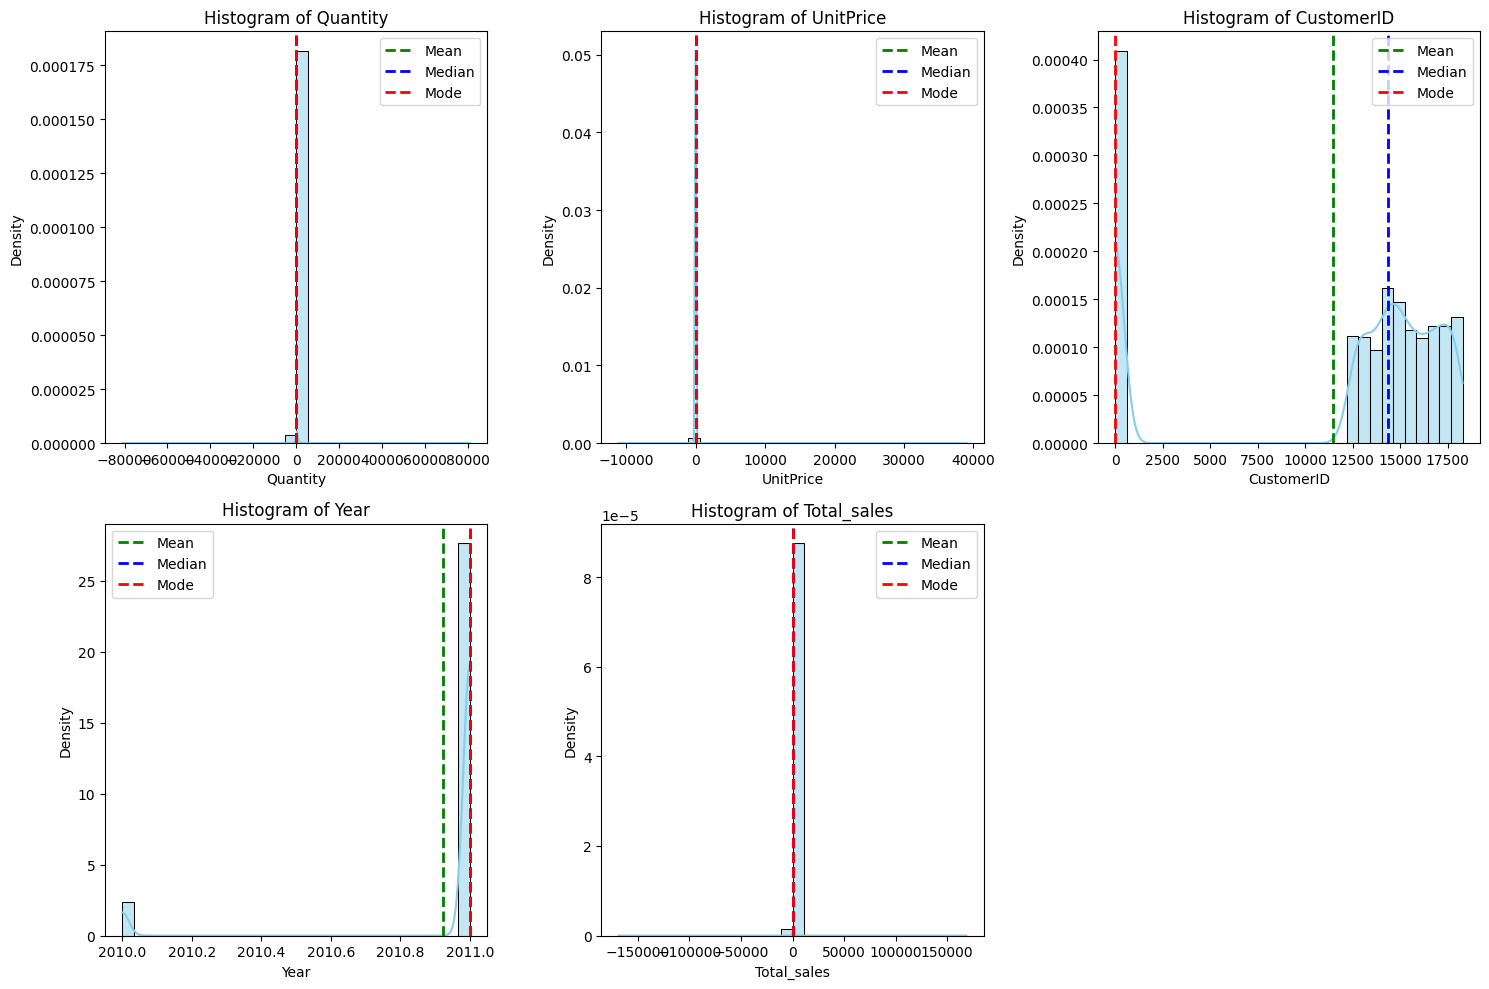

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['Quantity', 'UnitPrice', 'CustomerID', 'Year', 'Total_sales']

# Set up the figure and axes
plt.figure(figsize=(15, 10))

# Loop through each column and create a histogram
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns for subplot layout
    sns.histplot(Data[col], bins=30, kde=True, color='skyblue', stat='density')  # Use kde=True for a smoothed density curve
    plt.axvline(Data[col].mean(), color='green', linestyle='dashed', linewidth=2, label='Mean')  # Mean line
    plt.axvline(Data[col].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')  # Median line
    plt.axvline(Data[col].mode()[0], color='red', linestyle='dashed', linewidth=2, label='Mode')  # Mode line
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# Bivariate Analysis

<span style="font-family: Arial; font-weight: bold; font-size: 1.5em; color: #000000;">Correlation</span>

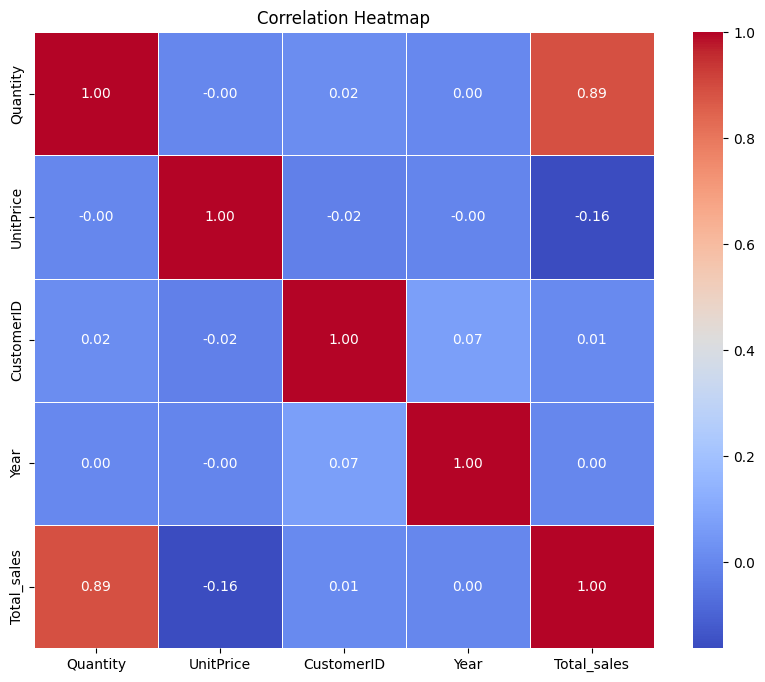

In [36]:
# Select only numerical columns from the dataframe
numerical_columns = Data.select_dtypes(include=[np.number])

# Compute the correlation matrix for numerical columns only
corr_matrix = numerical_columns.corr()

# Set up the figure for the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 10})

# Add title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()
